In [1]:
# Import Libraries
import numpy as np

from project_utils.bb_model         import BB_Model
from project_utils.feature_stats    import Feature_Statistics
from project_utils.feature_stats    import Regression_Container
from project_utils.acq_data_capture import Acq_Data
from project_utils.surroagte_gp     import Surrogate_GP



Num_Points = 1


(1000,)


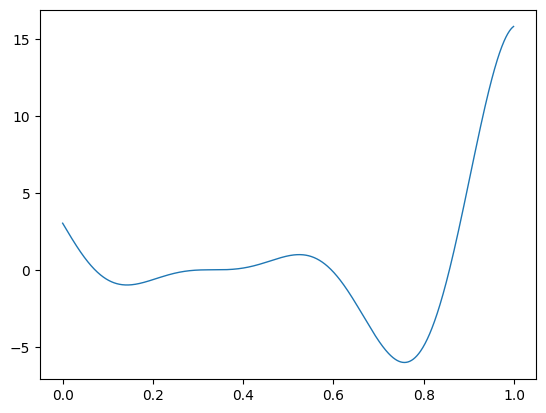

(1000, 1)


In [2]:
# Load Forrester model

Forrester_Data = BB_Model('Forrester')

#Forrester_Data.df().head()

In [3]:
Forrester_Data.MPL()

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.27910404531379485


MLPRegressor(random_state=RandomState(MT19937) at 0x284D96E9840)

In [4]:
Forrester_Data.Random_Forest()

0.9999491847732692


RandomForestRegressor(random_state=RandomState(MT19937) at 0x284D96E9840)

In [5]:
Forrester_Data.GP()

0.9947311969168919


GaussianProcessRegressor()

In [6]:
print(Forrester_Data.get_features())

['X']


In [7]:
#Default settings
from unravel_2.ur_model import UR_Model

X_train, X_test, y_train, y_test = Forrester_Data.get_TT_data()

#Initializing the explainer object
URM_Exp = UR_Model(bbox_model           = Forrester_Data.get_GP(),
                   train_data           = X_train,
                   feature_names        = Forrester_Data.get_features(),
                   categorical_features = Forrester_Data.get_catagorical(),
                   mode                 = Forrester_Data.get_mode(),
                   sampling_method      = "Gaussian")

#sur_GP = Surrogate_GP()


In [8]:
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
print('Mean 0:', mean)
print('Std 0: ', std)


Mean 0: [0.50090125]
Std 0:  [0.28529802]


In [ ]:
# Generate explantion data for Random Forest

Forrester_Stats = Feature_Statistics(feature_names = Forrester_Data.get_features(), mode = Forrester_Data.get_mode())

if Num_Points == 0: Num_Points = X_test.shape[0]

for test_instance in range(Num_Points):

    print('INSTANCE: ', test_instance)
       
#    data_row  = np.array([X_test[test_instance]])
    data_row  = np.array([0.4])
    print('data row ',data_row)
    
    #scores, acq_data = URM_Exp.explain(X_init            = data_row.reshape(1, -1),
    scores = URM_Exp.explain(X_init        = data_row.reshape(-1, 1),
                             kernel_type   = "Matern",
                             max_iter      = 20,
                             alpha         = "FUR_W",
                             #jitter=5,
                             normalize     = False,
                             use_opt       = True)
       
    f_predict = Forrester_Data.get_Random_Forest().predict(data_row.reshape(1, -1))

    e_predict = URM_Exp.exp_predict(data_row.reshape(-1, 1))
    e_predict = np.array(e_predict).ravel()
    
    acq_data = URM_Exp.get_acq_data()
    
#    X, y = URM_Exp.get_surrogate_data()

#    e_predict = sur_GP.predict(X, y)
#    e_predict = sur_GP.predict(URM_Exp.get_surrogate_data())

    print(f_predict, e_predict)
    
    Forrester_Stats.Add_Sample(sample_scores = scores,
                               outcome       = y_test[test_instance],
                               X_row         = data_row,
                               f_prediction  = f_predict,
                               e_prediction  = e_predict.ravel(),
                               feopt         = acq_data.get_fe_x0(),
                               model         = URM_Exp.get_exp_model())


INSTANCE:  0
data row  [0.4]
X train  [[0.4]]
ACQ [0.42970276] [1.00000004e-05]
ACQ [0.42149243] [0.19454794]
ACQ [0.42200949] [0.18837955]
ACQ [0.42068118] [0.20383586]
ACQ [0.3846368] [0.44581936]
ACQ [0.39849326] [0.37414664]
ACQ [0.36380318] [0.53216738]
ACQ [0.38772406] [0.43109283]
ACQ [0.42015561] [0.20962446]
ACQ [0.38479235] [0.4450918]
ACQ [0.4267355] [0.11731607]
ACQ [0.42965745] [0.01452112]
ACQ [0.42665246] [0.1189405]
ACQ [0.42937153] [0.03925671]
ACQ [0.39878875] [0.37243764]
ACQ [0.42813976] [0.08521469]
ACQ [0.36637309] [0.52253175]
ACQ [0.42404875] [0.16168721]
ACQ [0.40679596] [0.3221415]
ACQ [0.39092679] [0.4151325]
ACQ [0.34632263] [0.59197191]
ACQ [0.34968483] [0.58116874]
ACQ [0.42379265] [0.16528381]
ACQ [0.3842496] [0.44762403]
ACQ [0.42669208] [0.11816841]
ACQ [0.42596173] [0.13166763]
ACQ [0.41593302] [0.25112294]
ACQ [0.42760301] [0.09873782]
ACQ [0.38572149] [0.44071473]
ACQ [0.36996479] [0.50864155]
ACQ [0.42116357] [0.19836763]
ACQ [0.38390239] [0.4492345

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


ACQ [0.42970276] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [-0.53244019] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [131.00981902] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
X  [[0.08466734]]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] 

C:\Users\deneb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


ACQ [0.42970276] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [1.11682892] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [-1.08899913e-48] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [-0.44857025] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [-1.32825428e-171] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.48590088] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [-5.83200412e-296] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [-7.57403992e-282] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [-0.53244019] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [131.00981902] [1.00000004e-05]
ACQ [0.] [1.]
ACQ [1.38273378e-186] [1.]
ACQ [0.] [1.]
X  [[0.52353041]]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0.] [1.]
ACQ [0

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(f_predict)
print(e_predict)


In [ ]:
Forrester_Stats.Fidelity()

In [ ]:
#Forrester_Stats.Jaccard_Values()

In [ ]:
Forrester_Stats.Reg_Fidelity_Graph()

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern
from sklearn.gaussian_process.kernels import RBF

#X, y = URM_Exp.get_surrogate_data()
#kernel = Matern()

#GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 10, optimizer='fmin_l_bfgs_b', normalize_y = False, copy_X_train=True)
#GP.fit(X, y)
        
#print(y[0])
#fe = GP.predict(X[0].reshape(1,-1))
#print(fe)
#ey = URM_Exp.gpmodel_predict(X[0].reshape(1,-1))
#print(ey)


In [ ]:
acq_data.plot_point()

In [ ]:
acq_data.plot_point(1)

In [ ]:
acq_data.plot_point(2)

In [ ]:
acq_data.plot_point(3)

In [ ]:
acq_data.plot_point(4)

In [ ]:
acq_data.plot_point(5)

In [ ]:
acq_data.plot_point(6)

In [ ]:
acq_data.plot_point(7)

In [ ]:
acq_data.plot_point(8)

In [ ]:
acq_data.plot_point(9)

In [ ]:
acq_data.plot_point(10)

In [ ]:
acq_data.plot_point(11)

In [ ]:
acq_data.plot_point(12)

In [ ]:
acq_data.plot_point(13)

In [ ]:
acq_data.plot_point(14)

In [ ]:
acq_data.plot_point(15)

In [ ]:
acq_data.plot_point(16)

In [ ]:
acq_data.plot_point(17)

In [ ]:
acq_data.plot_point(18)

In [ ]:
acq_data.plot_point(19)

In [ ]:
acq_data.plot_all()